# Simple Handwritten Digit Classifier

## Load and view the data

In [1]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data has already been splitted into train and test set
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

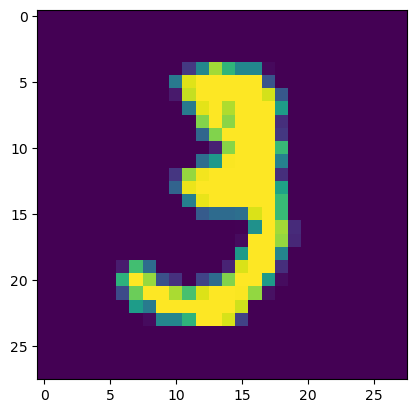

In [5]:
# Plot a single sample
plt.imshow(train_data[10]);

In [6]:
# Check out sample label
train_labels[10]

3

Text(0.5, 1.0, '4')

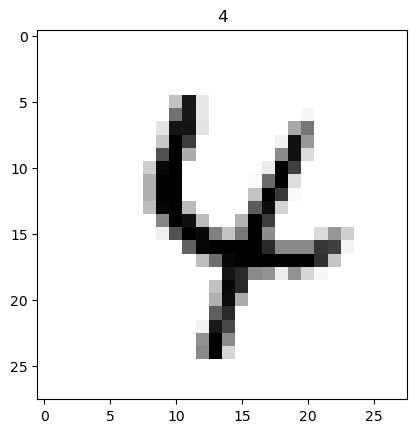

In [7]:
# Plot an example image and its label
index_of_choice = 142
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(train_labels[index_of_choice])

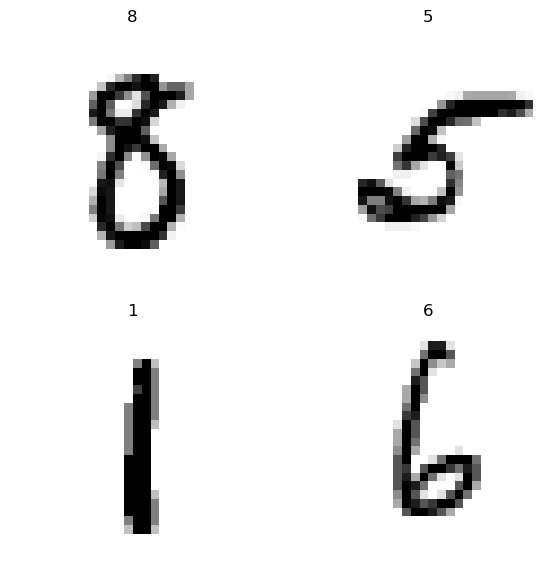

In [8]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False);

## Building a multiclass classification model

In [9]:
# Check the min and max of train data
train_data.min(), train_data.max()

(0, 255)

In [10]:
# Normalize train/test data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

### Base model

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(4, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_norm,
                       train_labels,
                       epochs=5,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/5


ValueError: in user code:

    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/tuanle/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 2352, but received input with shape (32, 784)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 28, 28), dtype=float32)
      • training=True
      • mask=None


### Second model - try CNN

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_norm,
                        train_labels,
                        epochs=5,
                        validation_data=(test_data_norm, test_labels))


Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2105 - accuracy: 0.9401 - val_loss: 0.0936 - val_accuracy: 0.9706
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0779 - accuracy: 0.9775 - val_loss: 0.0634 - val_accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0540 - val_accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.0536 - val_accuracy: 0.9836


### Let's combine these models

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1414 - accuracy: 0.9575 - val_loss: 0.0441 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0415 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0290 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0392 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0369 -

<Axes: >

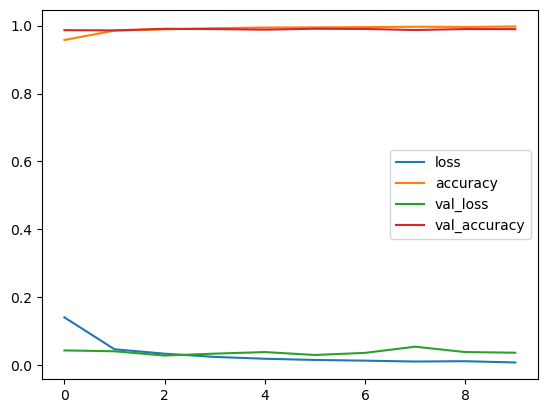

In [24]:
pd.DataFrame(history_3.history).plot()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images within the range of 10 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by a fraction of the width
    height_shift_range=0.1,  # Randomly shift images vertically by a fraction of the height
    zoom_range=0.1,  # Randomly zoom images by a factor of 0.1
    horizontal_flip=True  # Randomly flip images horizontally
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_data_norm.reshape(-1, 28, 28, 1))

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model with augmented data
history_4 = model_4.fit(datagen.flow(train_data_norm.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
                        epochs=10,
                        validation_data=(test_data_norm.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4497 - accuracy: 0.8522 - val_loss: 0.1104 - val_accuracy: 0.9638
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1730 - accuracy: 0.9456 - val_loss: 0.0681 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1329 - accuracy: 0.9581 - val_loss: 0.0689 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1156 - accuracy: 0.9635 - val_loss: 0.0869 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1027 - accuracy: 0.9676 - val_loss: 0.0558 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0921 - accuracy: 0.9708 - val_loss: 0.0639 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0858 - accuracy: 0.9734 - val_loss: 0.0411 -

In [36]:
# Data augmentation does not help, let's keep model 3
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

# Fit the model
history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels),
                       callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1454 - accuracy: 0.9550 - val_loss: 0.0588 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0427 - val_accuracy: 0.9869 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0315 - val_accuracy: 0.9890 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0358 - val_accuracy: 0.9890 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0410 - val_accuracy: 0.9877 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0412 - val_accuracy: 0.9886 - lr: 0.0032
Epoch 7/10
1875/1875 [========================

Text(0.5, 1.0, 'finding the ideal learning rate')

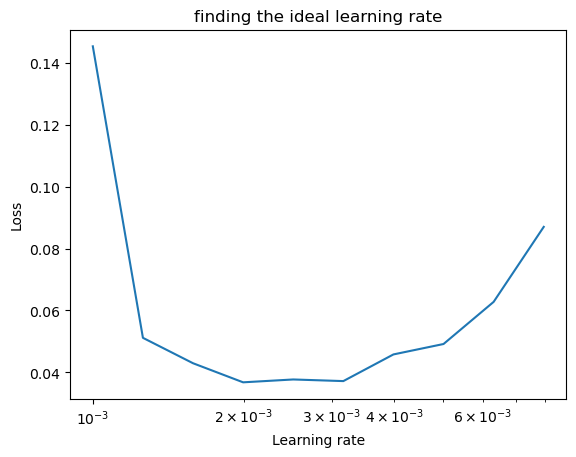

In [37]:
lrs = 1e-3 * (10**(tf.range(10)/10))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")

In [38]:
# Data augmentation does not help, let's keep model 3
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1276 - accuracy: 0.9606 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0495 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0295 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0367 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0451 -

<Axes: >

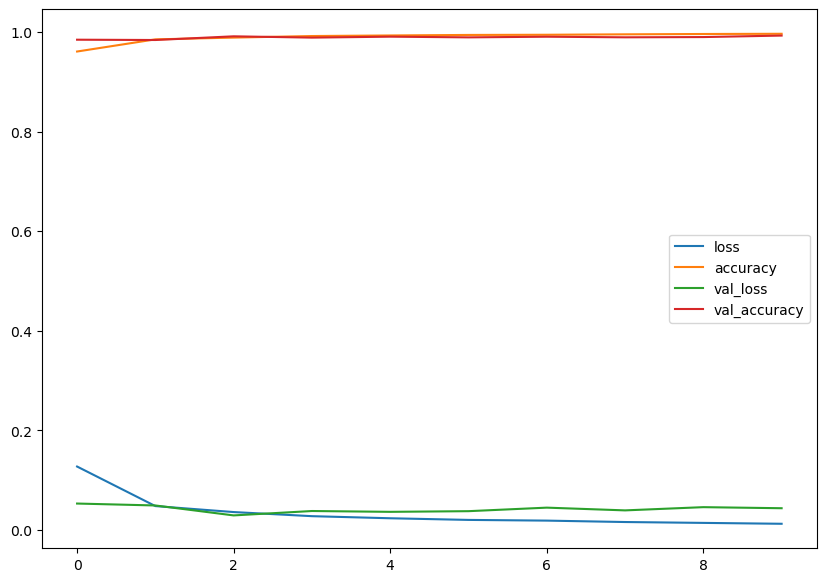

In [39]:
pd.DataFrame(history_6.history).plot(figsize=(10,7)) 